In [ ]:
import pandas as pd
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv('/content/archivetemptestset.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
# We can see all the column name has space in there names, lets assign new names with removed space.
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [ ]:
df.columns = map(lambda x: x.strip(), df.columns)

In [ ]:
df.columns # Space removed

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [ ]:
# Lets check the usual whether codition. We can see usually delhi's weather is either Haze, Smoke. Not good
# for health. :()
df._conds.value_counts(ascending=False)

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

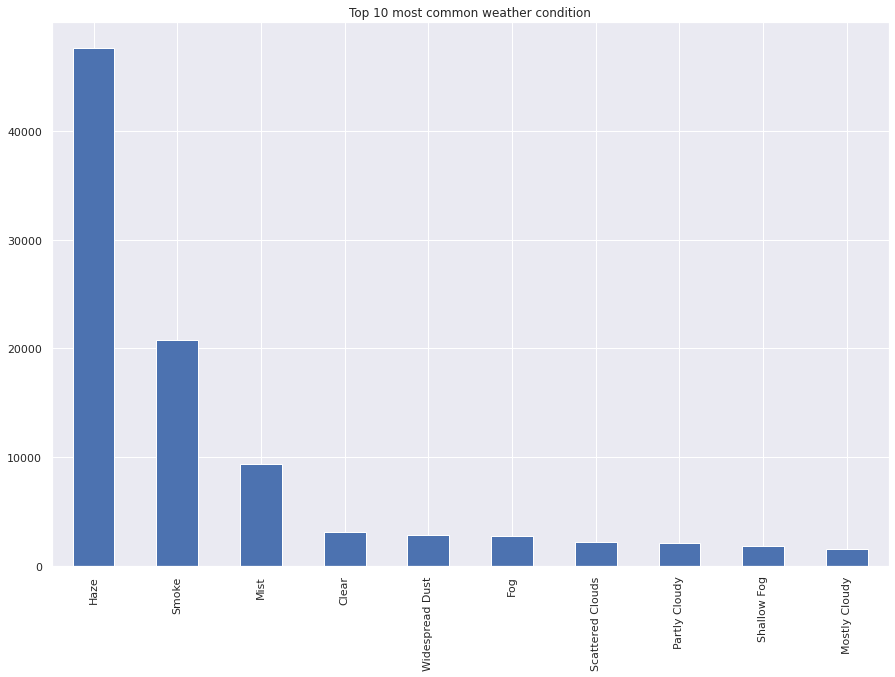

In [ ]:
# Lets plot top 10 weather condition in delhi.
plt.figure(figsize=(15, 10));
df._conds.value_counts().head(10).plot(kind='bar');
plt.title("Top 10 most common weather condition")
plt.plot();
# We can clearly see that haze and smoe are the most commo weather condition in delhi.

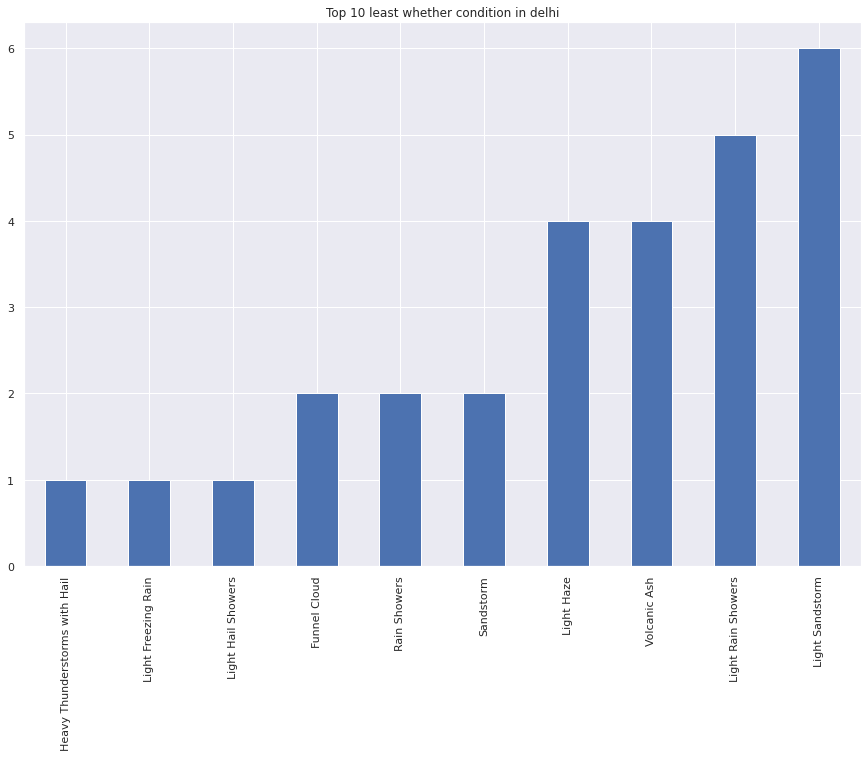

In [ ]:
# Lets see top 10 least condition
plt.figure(figsize=(15, 10));
df._conds.value_counts(ascending=True).head(10).plot(kind="bar");
plt.title("Top 10 least whether condition in delhi");
plt.plot();

In [ ]:
# common wind direction
df._wdire.value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

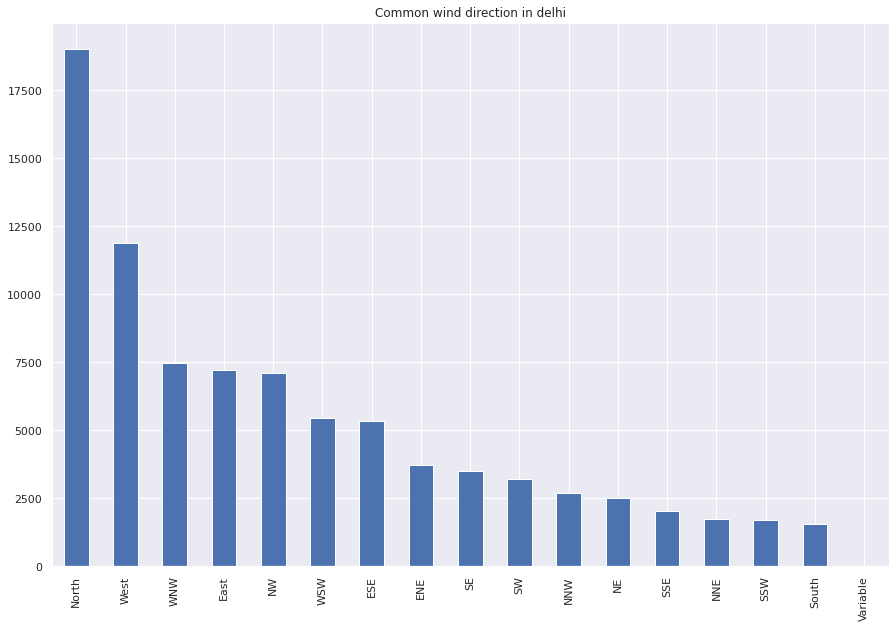

In [ ]:
plt.figure(figsize=(15, 10));
plt.title("Common wind direction in delhi");
df._wdire.value_counts().head(30).plot(kind="bar");
plt.plot();

In [ ]:
# Average temprature
print("average temprature in delhi:", round(df._tempm.mean(axis=0),2))

average temprature in delhi: 25.45


In [ ]:
# As we can see there is datetime column, We can extract year from it. Year can ve an important feature
# for us to calculate how temprature is changing according to year
def extract_year(value):        #a function to extract year part from the whole date
    return (value[0:4])

In [ ]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
# a function to extract month part from the whole date
def extract_month(value):
    return (value[4:6])

In [ ]:
def extract_day(value):
    return (value[6:8])

In [ ]:
def extract_hour(value):
    return (value[9:14])

In [ ]:
# Lets check our method
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x)) #making and adding new features like year and month
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))
df["day"] = df["datetime_utc"].apply(lambda x:extract_day(x))
df["hour"] = df["datetime_utc"].apply(lambda x:extract_hour(x))

In [ ]:
df.head() # So we can see a new column with year added

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month,day,hour
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4,1996,11,01,11:00
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11,01,12:00
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11,01,13:00
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN,1996,11,01,14:00
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0,1996,11,01,16:00


In [ ]:
# lets check out data range
print("max, min: ", df.year.max(), ",", df.year.min())

max, min:  2017 , 1996


In [ ]:
# Number of records for paticular year
df.year.value_counts()

2003    13186
2004     9151
2002     8503
2001     8403
2016     6634
1997     6513
1999     6300
2000     5391
1998     3579
2014     2973
2015     2936
2005     2920
2007     2865
2006     2858
2008     2857
2009     2851
2010     2768
2011     2738
2012     2438
2013     2428
2017     1420
1996     1278
Name: year, dtype: int64

In [ ]:
df.groupby("year")._tempm.mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    27.315734
2017    20.204369
Name: _tempm, dtype: float64

In [ ]:
df_mean = df.groupby("year")._tempm.mean().reset_index().sort_values('_tempm', ascending=True)
df_mean                         #sort the mean values of temp with ascending order


,year,_tempm
0,1996,16.518636
21,2017,20.204369
4,2000,23.865647
1,1997,24.444635
12,2008,24.525744
17,2013,24.679222
9,2005,24.712715
11,2007,24.800211
2,1998,24.847371
15,2011,24.966362


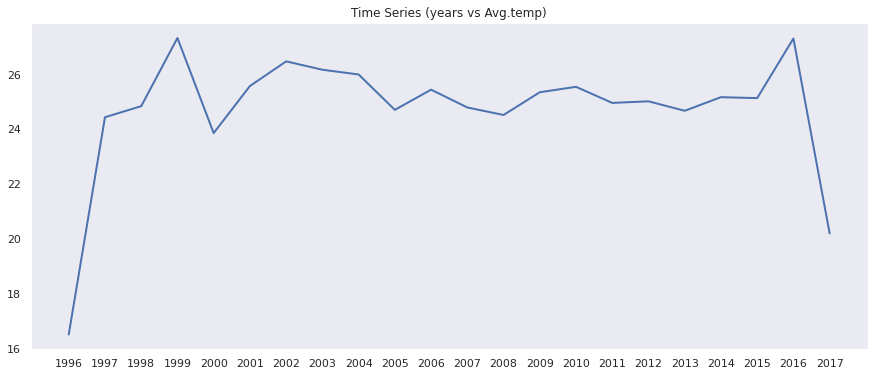

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df.groupby("year")._tempm.mean(), linewidth=2)
plt.grid()
plt.title("Time Series (years vs Avg.temp)")     #Time series 
plt.show()

In [ ]:
df_mean.dtypes

year       object
_tempm    float64
dtype: object

In [ ]:
df_mean.year = df_mean.year.astype("float")

In [ ]:
df_mean.dtypes

year      float64
_tempm    float64
dtype: object

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


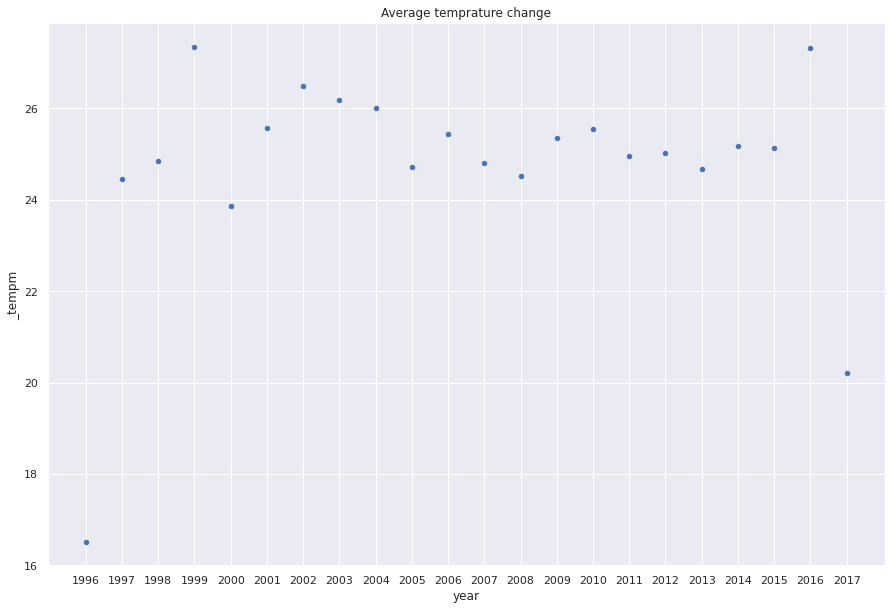

In [ ]:
df_mean.plot(kind="scatter", x="year", y="_tempm", figsize=(15, 10))
#plot btw average temp yearwise
plt.xticks(df_mean.year);
plt.title("Average temprature change");
plt.plot();

In [ ]:
df.isnull().sum()

datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
year                 0
month                0
day                  0
hour                 0
dtype: int64

In [ ]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', # 
       '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire'
       , '_wspdm', 'year', "month",'day', 'hour']]

In [ ]:
# Lets replace missing values in _dewptm. We can take an avrgae of that year
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day,hour
124,19961108-01:00,Smoke,NaN,0,0,NaN,1014.0,0,0,NaN,0,0,2.0,0.0,North,0.0,1996,11,08,01:00
240,19961113-02:00,Smoke,NaN,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11,13,02:00
303,19961116-06:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11,16,06:00
520,19961126-04:00,Smoke,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.6,0.0,North,0.0,1996,11,26,04:00
584,19961129-18:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,0.7,0.0,North,0.0,1996,11,29,18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96965,20160907-08:30,Haze,NaN,0,0,NaN,1005.0,0,0,NaN,0,0,4.5,320.0,NW,9.3,2016,09,07,08:30
97259,20160924-12:30,Haze,NaN,0,0,NaN,1002.0,0,0,NaN,0,0,3.0,0.0,North,0.0,2016,09,24,12:30
98049,20161025-07:30,Widespread Dust,NaN,0,0,NaN,1009.0,0,0,NaN,0,0,3.5,280.0,West,14.8,2016,10,25,07:30
99347,20161221-05:30,Haze,NaN,0,0,NaN,1018.0,0,0,NaN,0,0,3.0,270.0,West,11.1,2016,12,21,05:30


In [ ]:
# We will try to replace value with average value of that year
for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._dewptm.mean()
    df_filtered.at[index, "_dewptm"] = mean_val

In [ ]:
df_filtered[df_filtered._dewptm.isnull()] # We replaced null values fof _dewtmp
df_filtered

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day,hour
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11,01,11:00
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11,01,12:00
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11,01,13:00
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11,01,14:00
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11,01,16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1,2017,04,24,06:00
100986,20170424-09:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2,2017,04,24,09:00
100987,20170424-12:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5,2017,04,24,12:00
100988,20170424-15:00,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,0,2.0,320.0,NW,3.7,2017,04,24,15:00


In [ ]:
df_filtered.shape

(100990, 20)

In [ ]:
df_filtered.isnull().sum()
# so now we have only relevant columns. Lets handle them one by one

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum              757
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
day                 0
hour                0
dtype: int64

In [ ]:
# Handle _hum column.
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day,hour
124,19961108-01:00,Smoke,5.992851,0,0,NaN,1014.0,0,0,NaN,0,0,2.00,0.0,North,0.0,1996,11,08,01:00
240,19961113-02:00,Smoke,5.992851,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11,13,02:00
303,19961116-06:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11,16,06:00
520,19961126-04:00,Smoke,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.60,0.0,North,0.0,1996,11,26,04:00
584,19961129-18:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,0.70,0.0,North,0.0,1996,11,29,18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98641,20161117-07:30,Unknown,10.000000,0,0,NaN,1017.0,0,0,NaN,0,0,NaN,0.0,North,NaN,2016,11,17,07:30
99268,20161217-09:00,Smoke,11.000000,0,0,NaN,1016.0,0,0,NaN,0,0,1.00,20.0,NNE,25.9,2016,12,17,09:00
99347,20161221-05:30,Haze,18.274320,0,0,NaN,1018.0,0,0,NaN,0,0,3.00,270.0,West,11.1,2016,12,21,05:30
99567,20161231-15:00,NaN,13.000000,0,0,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,59.3,2016,12,31,15:00


In [ ]:
# We will use the same logic o replace as we did before.
# We will try to replace value with average value of that year
for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val

In [ ]:
df_filtered[df_filtered._hum.isnull()] # replaced
df_filtered

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day,hour
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11,01,11:00
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11,01,12:00
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11,01,13:00
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11,01,14:00
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11,01,16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1,2017,04,24,06:00
100986,20170424-09:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2,2017,04,24,09:00
100987,20170424-12:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5,2017,04,24,12:00
100988,20170424-15:00,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,0,2.0,320.0,NW,3.7,2017,04,24,15:00


In [ ]:
df_filtered.isnull().sum() # Now lets handle _pressurem

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
day                 0
hour                0
dtype: int64

In [ ]:
df_filtered[df_filtered._pressurem.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day,hour
60703,20040625-21:00,Haze,21.0,0,0,62.0,NaN,0,0,26.0,0,0,2.0,NaN,NaN,0.0,2004,06,25,21:00
60723,20040628-09:00,Haze,20.0,0,0,27.0,NaN,0,0,37.0,0,0,4.0,0.0,North,3.7,2004,06,28,09:00
60728,20040629-00:00,Haze,21.0,0,0,63.0,NaN,0,0,27.0,0,0,2.0,NaN,NaN,0.0,2004,06,29,00:00
60921,20040723-09:00,Haze,24.0,0,0,37.0,NaN,0,0,37.0,0,0,2.0,NaN,NaN,0.0,2004,07,23,09:00
61255,20040829-18:00,Haze,27.0,0,0,75.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,08,29,18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96567,20160821-00:00,Mist,25.0,0,0,81.0,NaN,0,0,28.0,0,0,2.0,110.0,ESE,9.3,2016,08,21,00:00
96907,20160902-18:00,Mist,25.0,0,0,79.0,NaN,0,0,28.0,0,0,2.0,270.0,West,7.4,2016,09,02,18:00
98402,20161108-06:00,Smoke,14.0,0,0,39.0,NaN,0,0,25.0,0,0,1.0,270.0,West,22.2,2016,11,08,06:00
98820,20161126-09:00,Haze,8.0,0,0,15.0,NaN,0,0,30.0,0,0,4.0,290.0,WNW,14.8,2016,11,26,09:00


In [ ]:
# if you see pressure column, there are few -9999 values. Which is obviously bad values and it can affect your
# calculations very badly. So we will consider this also missing values. Lets convert them first to the nan
df_filtered._pressurem.replace(-9999.0, np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df_filtered.head() # so now -9999.0 is Nan.Lets again get the number of missing values in _pressurem

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month,day,hour
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11,01,11:00
1,19961101-12:00,Smoke,10.0,0,0,32.0,NaN,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11,01,12:00
2,19961101-13:00,Smoke,11.0,0,0,44.0,NaN,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11,01,13:00
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11,01,14:00
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11,01,16:00


In [ ]:
df_filtered._pressurem.isnull().sum() # So u can see previsously it was 232 and now its 983. 
# We need to check the data for this kin of errors.
# So we will use the same idea as before We will replace missing values with the mean values of _hum column
# for that partcular year.

983

In [ ]:
for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val

In [ ]:
df_filtered.isnull().sum() # pressurem is also resolved. Lets apply same for other columns. I will make
# it quickly. Process will be the same as above.

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
day                 0
hour                0
dtype: int64

In [ ]:
for index,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[index, "_tempm"] = mean_val

In [ ]:
for index,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[index, "_vism"] = mean_val

In [ ]:
for index,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[index, "_wdird"] = mean_val

In [ ]:
for index,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[index, "_wspdm"] = mean_val

In [ ]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm              0
_thunder            0
_tornado            0
_vism               0
_wdird              0
_wdire          14755
_wspdm              0
year                0
month               0
day                 0
hour                0
dtype: int64

In [ ]:
# As we can see _wdire is a categorical feature so we can not apply mean here. We have to get the most frequent
# value of _wdire for a year and then replace missing value with the most frequent value.
for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent

In [ ]:
df_filtered.isnull().sum()

datetime_utc     0
_conds          72
_dewptm          0
_fog             0
_hail            0
_hum             0
_pressurem       0
_rain            0
_snow            0
_tempm           0
_thunder         0
_tornado         0
_vism            0
_wdird           0
_wdire           0
_wspdm           0
year             0
month            0
day              0
hour             0
dtype: int64

In [ ]:
# now we can see,  _conds which is again acategorical feature.
# so we will apply again the same strategy as above(_wdire)
for index,row in df_filtered[df_filtered._conds.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._conds.value_counts().idxmax()
    df_filtered.at[index, "_conds"] = most_frequent

In [ ]:
df_filtered.isnull().sum()

datetime_utc    0
_conds          0
_dewptm         0
_fog            0
_hail           0
_hum            0
_pressurem      0
_rain           0
_snow           0
_tempm          0
_thunder        0
_tornado        0
_vism           0
_wdird          0
_wdire          0
_wspdm          0
year            0
month           0
day             0
hour            0
dtype: int64

In [ ]:
df_filtered.year = df_filtered.year.astype("object")
df_filtered.month = df_filtered.month.astype("object")
df_filtered.day = df_filtered.day.astype("object")
df_filtered.hour = df_filtered.hour.astype("object")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_filtered.dtypes
#df_filtered['datetime_utc']

datetime_utc     object
_conds           object
_dewptm         float64
_fog              int64
_hail             int64
_hum            float64
_pressurem      float64
_rain             int64
_snow             int64
_tempm          float64
_thunder          int64
_tornado          int64
_vism           float64
_wdird          float64
_wdire           object
_wspdm          float64
year             object
month            object
day              object
hour             object
dtype: object

In [ ]:
pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean")

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.415046,13.865403
1997,13.048083,15.825284,21.173384,26.300805,29.900929,31.735553,31.076391,29.450078,29.695443,24.130558,19.957239,13.698195
1998,13.144290,16.510567,19.882767,28.698630,33.991784,32.450593,29.923938,29.179850,29.119385,25.276475,20.306736,14.682166
1999,12.594269,16.743446,22.465106,31.419503,34.269136,34.281680,31.998110,32.903209,30.738490,27.700867,22.663247,15.271864
2000,13.803659,15.104891,NaN,35.000000,26.000000,32.442863,30.245092,31.881618,30.125521,28.188217,22.112297,16.154194
2001,12.658686,18.287586,23.564530,29.666763,32.988538,30.981903,30.912933,31.112729,31.174088,27.831502,21.620347,15.959586
2002,14.277785,17.470228,24.534641,32.058416,35.373743,34.219867,35.355093,30.697186,28.428300,27.166094,21.377793,16.904873
2003,11.931473,17.958429,23.538990,31.716751,34.950594,35.455894,30.293639,29.966644,28.951836,26.453855,20.371110,15.211904
2004,13.232766,18.734445,26.633420,31.858427,34.314077,33.072721,32.657179,29.602128,29.948052,24.262331,19.474359,15.534730


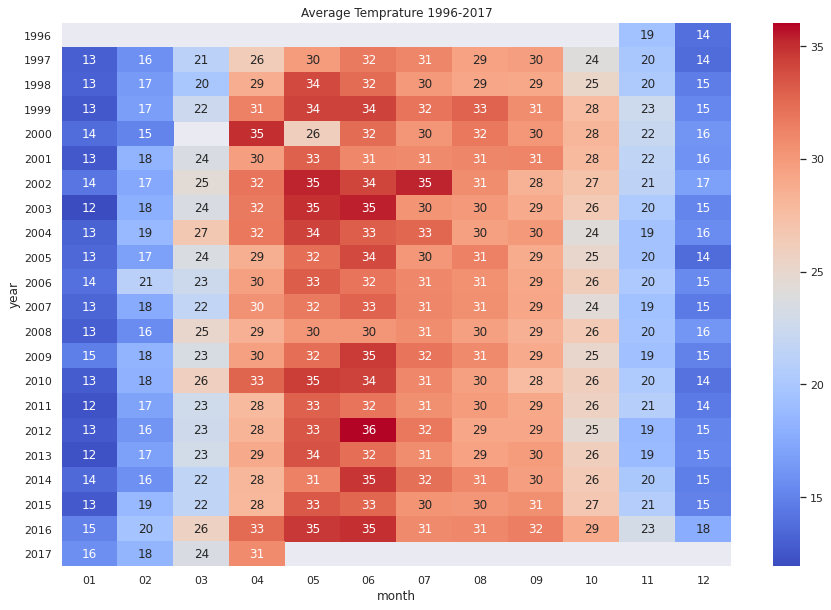

In [ ]:
# Heatmap for year and average temprature across the month. More red more heat, more blue less heat
plt.figure(figsize=(15, 10));
sns.heatmap(pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean"),
            cmap="coolwarm", annot=True, cbar=True);
plt.title("Average Temprature 1996-2017")
plt.plot();

In [ ]:
df_filtered._conds.value_counts()

Haze                             47674
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
df_filtered.columns
#df_filtered['datetime_utc']

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wdire', '_wspdm', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month','day', 'hour', '_conds']

In [ ]:
# Lets create a new dataset, so that we dont change in our filtered dataset
# We will create dataset in such a way, _wdire(categorical feature in starting position & target variable
# at last which is _conds
df_final = df_filtered[feature_columns]

In [ ]:
df_final.head()

,_wdire,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,day,hour,_conds
0,West,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,01,11:00,Smoke
1,North,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,01,12:00,Smoke
2,North,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,01,13:00,Smoke
3,North,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,01,14:00,Smoke
4,North,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,01,16:00,Smoke


In [ ]:
df_final.dtypes

_wdire         object
_dewptm       float64
_fog            int64
_hail           int64
_hum          float64
_pressurem    float64
_rain           int64
_snow           int64
_tempm        float64
_thunder        int64
_tornado        int64
_vism         float64
_wdird        float64
_wspdm        float64
year           object
month          object
day            object
hour           object
_conds         object
dtype: object

In [ ]:
df_final._wdire.value_counts()

West        19970
North       19714
NW          13110
WNW          7464
East         7233
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

In [ ]:
wdire_dummies = pd.get_dummies(df_final["_wdire"])

In [ ]:
df_final = pd.concat([wdire_dummies, df_final], axis=1)

In [ ]:
df_final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW,West,_wdire,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,day,hour,_conds
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,West,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,01,11:00,Smoke
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,North,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,01,12:00,Smoke
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,North,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,01,13:00,Smoke
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,North,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,01,14:00,Smoke
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,North,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,01,16:00,Smoke


In [ ]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_wdire',
       '_dewptm', '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow',
       '_tempm', '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year',
       'month', 'day', 'hour', '_conds'],
      dtype='object')

In [ ]:
df_final.drop("_wdire", inplace=True, axis=1)

In [ ]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       'day', 'hour', '_conds'],
      dtype='object')

In [ ]:
X = df_final.iloc[:, 0:-1].values
X.shape
#X

(100990, 34)

In [ ]:
y = df_final.iloc[:, -1].values
#y.shape
y

array(['Smoke', 'Smoke', 'Smoke', ..., 'Haze', 'Haze', 'Haze'],
      dtype=object)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)
y

array([31, 31, 31, ...,  5,  5,  5])

In [ ]:
y.shape

(100990,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0) # test size =0.25 or 25%

In [ ]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (75742, 34)
Shape of X_test (25248, 34)
Shape of y_train (75742,)
Shape of y_test (25248,)


In [ ]:
X_train

array([[0, 0, 1, ..., '08', '22', '07:30'],
       [0, 0, 0, ..., '09', '14', '12:00'],
       [0, 1, 0, ..., '06', '15', '19:30'],
       ...,
       [0, 0, 1, ..., '04', '25', '15:30'],
       [0, 0, 0, ..., '05', '28', '00:30'],
       [0, 0, 0, ..., '01', '24', '12:00']], dtype=object)

In [ ]:
X_test

array([[0, 0, 0, ..., '05', '19', '00:00'],
       [0, 0, 0, ..., '08', '27', '15:00'],
       [0, 0, 0, ..., '11', '21', '18:40'],
       ...,
       [0, 0, 0, ..., '08', '23', '12:00'],
       [0, 0, 0, ..., '09', '26', '20:30'],
       [0, 0, 0, ..., '12', '17', '21:00']], dtype=object)

In [ ]:
for i in X_train:
  i[33]=i[33].replace(":","")
print(X_train)

[[0 0 1 ... '08' '22' '0730']
 [0 0 0 ... '09' '14' '1200']
 [0 1 0 ... '06' '15' '1930']
 ...
 [0 0 1 ... '04' '25' '1530']
 [0 0 0 ... '05' '28' '0030']
 [0 0 0 ... '01' '24' '1200']]


In [ ]:
for i in X_test:
  i[33]=i[33].replace(":","")
print(X_test)

[[0 0 0 ... '05' '19' '0000']
 [0 0 0 ... '08' '27' '1500']
 [0 0 0 ... '11' '21' '1840']
 ...
 [0 0 0 ... '08' '23' '1200']
 [0 0 0 ... '09' '26' '2030']
 [0 0 0 ... '12' '17' '2100']]


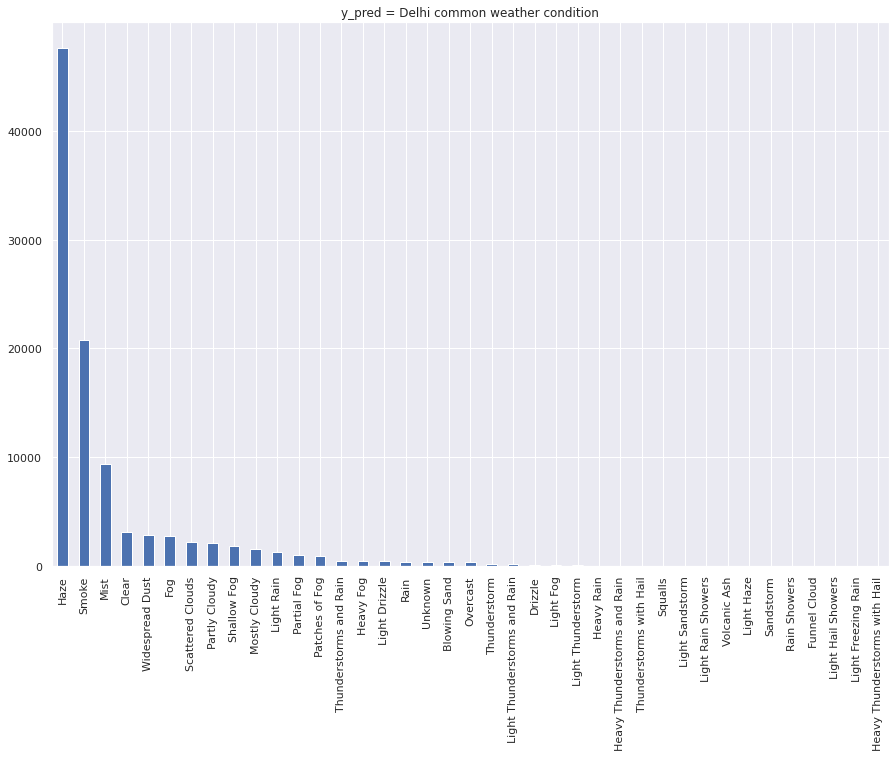

In [ ]:
plt.figure(figsize=(15, 10));
df._conds.value_counts().head(39).plot(kind='bar');
plt.title("y_pred = Delhi common weather condition")
plt.plot();

# **Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
#y_pred1 = clf.predict(X_train)
#y_pred1

In [ ]:
y_pred            #y_pred[::10]     #total_condn=39

array([ 5,  5, 31, ..., 15, 24, 20])

In [ ]:
#y_test[::10]

In [ ]:
from sklearn import metrics                                                                   
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ",round(100* metrics.accuracy_score(y_test, y_pred),2))

DecisionTrees's Accuracy:  80.05


# **Random Forest Algorithm**
The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)
print(predictions)

[ 5  5 31 ... 15 24 20]


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("RandomForest's Accuracy: ",round(100* metrics.accuracy_score(y_test,predictions),2))

RandomForest's Accuracy:  84.8


# ML Algorithm  Accuracy(%)


In [ ]:
df1 = pd.DataFrame({'Actual test data': y_test, 'Predicted DT':y_pred,'Predicted RFC':predictions})
op = df1[28:40].replace()	
print(op)

    Actual test data  Predicted DT  Predicted RFC
28                30             3             30
29                 5             5              5
30                 5             5              5
31                 5             5              5
32                15            15             15
33                20            20             20
34                 3             3              3
35                20             5              5
36                 5             5              5
37                 5             5              5
38                 5             5              5
39                 5             5              5


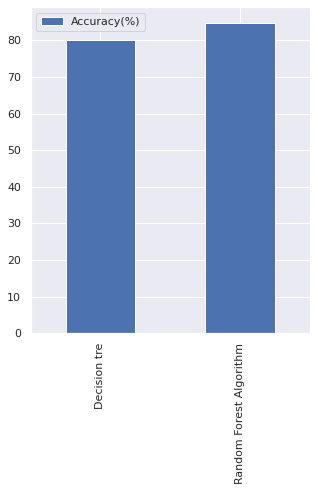

In [ ]:
x=round(100* metrics.accuracy_score(y_test, y_pred),2)       #dct
y=round(100* metrics.accuracy_score(y_test,predictions),2)   #rfc
data = {'ML Algorithm': ['Decision tree', 'Random Forest Algorithm '], 'Accuracy(%)': [x,y]}
#Z = pd.DataFrame(data).to_string(index={1: 'a'})
Z = pd.DataFrame(data,index=['Decision tre', 'Random Forest Algorithm'])
Z.plot(figsize=(5,6),kind = 'bar',)

In [ ]:
X_test[:,(30,31)]
a=pd.DataFrame(X_test[:,(30,31)])
a['Date'] = a[1].map(str) + '-' + a[0].map(str) 
b=a['Date']
b=np.array(a['Date'])


In [ ]:
dt=pd.DataFrame(y_pred)
d=dt[100:500]

rfc=pd.DataFrame(predictions)
e=rfc[100:500]



In [ ]:
y_pred

array([ 5,  5, 31, ..., 15, 24, 20])

In [ ]:
Actual_and_Predicted_Values = pd.DataFrame({'date': b, 'actual': y_test, 'prediction(DT)': y_pred})
Actual_and_Predicted_Values.head(20)

,date,actual,prediction(DT)
0,05-2005,5,5
1,08-2009,5,5
2,11-1997,31,31
3,05-2004,1,24
4,02-2001,31,31
5,07-1997,5,5
6,08-2014,20,20
7,03-2014,20,20
8,06-2003,21,21
9,04-2004,5,5


In [ ]:
Two_models_prediction = pd.DataFrame({'date': b,'actual': y_test,'prediction(DT)': y_pred,'prediction(RFC)':predictions})
Two_models_prediction

,date,actual,prediction(DT),prediction(RFC)
0,05-2005,5,5,5
1,08-2009,5,5,5
2,11-1997,31,31,31
3,05-2004,1,24,24
4,02-2001,31,31,31
...,...,...,...,...
25243,01-2000,31,31,31
25244,04-2001,5,5,5
25245,08-2006,15,15,15
25246,09-2003,24,24,24
